In [1]:
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from util import load, load2d, plot_sample, plot_loss
import os

from tensorflow.python.keras.callbacks import TensorBoard

print(tf.__version__)
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.visible_device_list = "0"
#### 1 GPU1
#### 2 GPU2
#### 0 GPU3
#### 4 GPU4
K.backend.clear_session()
K.backend.set_session(tf.Session(config=config))

from time import time

tensorboard = TensorBoard(log_dir="./logs/{}".format(time()))

1.12.0


### Model 1: Simple Feed Forward Neural Network

In [3]:
X1d, y = load()
X1d_test , y_test = load(test=True)

                        index     0
0           left_eye_center_x  7039
1           left_eye_center_y  7039
2          right_eye_center_x  7036
3          right_eye_center_y  7036
4     left_eye_inner_corner_x  2271
5     left_eye_inner_corner_y  2271
6     left_eye_outer_corner_x  2267
7     left_eye_outer_corner_y  2267
8    right_eye_inner_corner_x  2268
9    right_eye_inner_corner_y  2268
10   right_eye_outer_corner_x  2268
11   right_eye_outer_corner_y  2268
12   left_eyebrow_inner_end_x  2270
13   left_eyebrow_inner_end_y  2270
14   left_eyebrow_outer_end_x  2225
15   left_eyebrow_outer_end_y  2225
16  right_eyebrow_inner_end_x  2270
17  right_eyebrow_inner_end_y  2270
18  right_eyebrow_outer_end_x  2236
19  right_eyebrow_outer_end_y  2236
20                 nose_tip_x  7049
21                 nose_tip_y  7049
22        mouth_left_corner_x  2269
23        mouth_left_corner_y  2269
24       mouth_right_corner_x  2270
25       mouth_right_corner_y  2270
26     mouth_center_top_lip_

In [3]:
def simple_ffnn_model():
    model = K.Sequential()
    model.add(
        K.layers.Dense(units=100, input_dim=X1d.shape[1], name="dense")
    )
    model.add(
        K.layers.Activation(
            'relu',
            name="activation"
        )
    )
    model.add(
        K.layers.Dense(units=30, name="output_ffnn")
    )
    
    sgd = K.optimizers.SGD(lr=0.01,momentum = 0.9,nesterov=True)
    model.compile(loss="mean_squared_error",optimizer=sgd)
    model.summary()
    
    return model

In [4]:
model1 = simple_ffnn_model()
hist1 = model1.fit(X1d, y, epochs=1000, validation_split=0.2, verbose=False, callbacks=[tensorboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               921700    
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
output_ffnn (Dense)          (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________


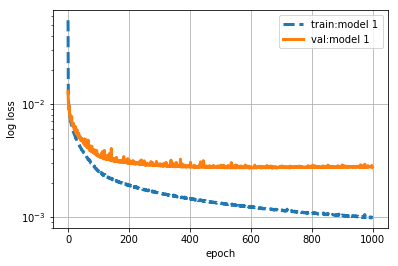

In [5]:
plot_loss(hist1.history, "model 1", plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

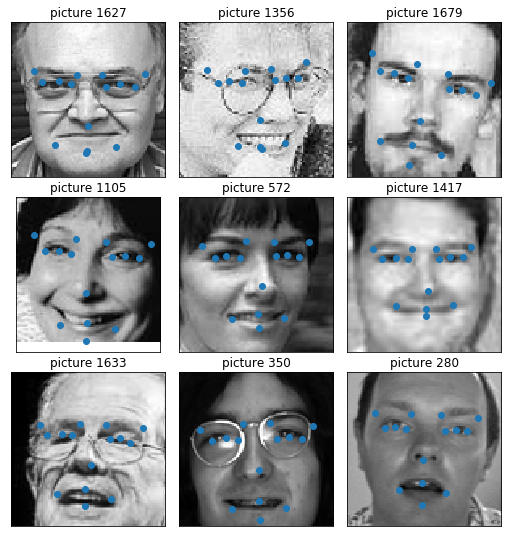

In [13]:
y_pred = model1.predict(X1d_test)

fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(hspace=0.13,wspace=0.0001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 9
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(X1d_test.shape[0])
    ax = fig.add_subplot(Npicture/3 , 3, count,xticks=[],yticks=[])        
    plot_sample(X1d_test[ipic],y_pred[ipic],ax)
    ax.set_title("picture "+ str(ipic))
    count += 1
plt.show()

In [6]:
sess = K.backend.get_session()
constant_graph = tf.graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), ['output_ffnn/BiasAdd'])
tf.train.write_graph(constant_graph, "", "output_model_1.pb", as_text=False)

INFO:tensorflow:Froze 4 variables.
INFO:tensorflow:Converted 4 variables to const ops.


'output_model_1.pb'

### Model 2: Simple Convolutional Neural Network

In [7]:
X2d, y = load2http://localhost:8888/notebooks/freeze_a_keras_model/facial_key_point_tensorflow_keras.ipynb#Model-2:-Simple-Convolutional-Neural-Networkd()
X2d_test , y_test = load2d(test=True)

                        index     0
0           left_eye_center_x  7039
1           left_eye_center_y  7039
2          right_eye_center_x  7036
3          right_eye_center_y  7036
4     left_eye_inner_corner_x  2271
5     left_eye_inner_corner_y  2271
6     left_eye_outer_corner_x  2267
7     left_eye_outer_corner_y  2267
8    right_eye_inner_corner_x  2268
9    right_eye_inner_corner_y  2268
10   right_eye_outer_corner_x  2268
11   right_eye_outer_corner_y  2268
12   left_eyebrow_inner_end_x  2270
13   left_eyebrow_inner_end_y  2270
14   left_eyebrow_outer_end_x  2225
15   left_eyebrow_outer_end_y  2225
16  right_eyebrow_inner_end_x  2270
17  right_eyebrow_inner_end_y  2270
18  right_eyebrow_outer_end_x  2236
19  right_eyebrow_outer_end_y  2236
20                 nose_tip_x  7049
21                 nose_tip_y  7049
22        mouth_left_corner_x  2269
23        mouth_left_corner_y  2269
24       mouth_right_corner_x  2270
25       mouth_right_corner_y  2270
26     mouth_center_top_lip_

In [8]:
def simple_cnn_model():
    model = K.models.Sequential()
    model.add(
        K.layers.Conv2D(
            filters=32,
            kernel_size=(3, 3),
            strides=(1, 1),
            padding='SAME',
            input_shape=(96, 96, 1),
            name='conv_1'
        )
    )
    model.add(
        K.layers.Activation(
            'relu',
            name='activation_1'
        )
    )
    model.add(
        K.layers.MaxPooling2D(
            pool_size = (2,2),
            name='pool_1'
        )
    )
    
    model.add(
        K.layers.Conv2D(
            filters=64,
            kernel_size=(3, 3),
            strides=(1, 1),
            padding='SAME',
            input_shape=(96, 96, 1),
            name='conv_2'
        )
    )
    model.add(
        K.layers.Activation(
            'relu',
            name='activation_2'
        )
    )
    model.add(
        K.layers.MaxPooling2D(
            pool_size = (2,2),
            name='pool_2'
        )
    )
    
    model.add(
        K.layers.Conv2D(
            filters=128,
            kernel_size=(3, 3),
            strides=(1, 1),
            padding='SAME',
            input_shape=(96, 96, 1),
            name='conv_3'
        )
    )
    model.add(
        K.layers.Activation(
            'relu',
            name='activation_3'
        )
    )
    model.add(
        K.layers.MaxPooling2D(
            pool_size = (2,2),
            name='pool_3'
        )
    )
    
    model.add( K.layers.Reshape((12*12*128,), name='reshape') )
    
    model.add(
        K.layers.Dense(units=512, activation=K.activations.relu, name='dense_1')
    )
    
    model.add(
        K.layers.Dense(units=512, activation=K.activations.relu, name='dense_2')
    )
    
    model.add(
        K.layers.Dense(units=30, name='output_cnn')
    )
    
    sgd = K.optimizers.SGD(lr=0.01,momentum = 0.9,nesterov=True)
    model.compile(loss="mean_squared_error",optimizer=sgd)
    model.summary()
    
    return model

In [9]:
model2 = simple_cnn_model()
hist2 = model2.fit(X2d, y, epochs=1000, validation_split=0.2, verbose=False, callbacks=[tensorboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 48, 48, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 48, 48, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 24, 24, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 24, 24, 128)       73856     
__________

In [10]:
sess = K.backend.get_session()
constant_graph = tf.graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), ['output_cnn/BiasAdd'])
tf.train.write_graph(constant_graph, "", "output_model_2.pb", as_text=False)

INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.


'output_model_2.pb'

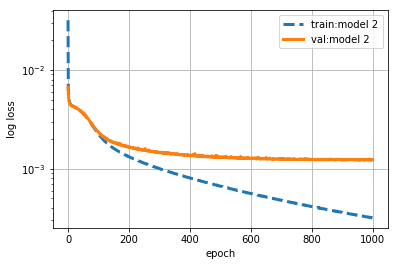

In [11]:
plot_loss(hist2.history, "model 2", plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

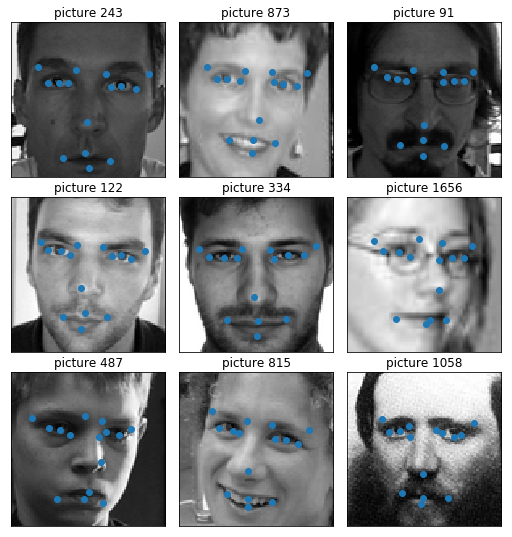

In [15]:
y_pred = model2.predict(X2d_test)

fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(hspace=0.13,wspace=0.0001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 9
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(X2d_test.shape[0])
    ax = fig.add_subplot(Npicture/3 , 3, count,xticks=[],yticks=[])        
    plot_sample(X2d_test[ipic],y_pred[ipic],ax)
    ax.set_title("picture "+ str(ipic))
    count += 1
plt.show()

### Model 3:  Simple Convolutional Neural Network with data augmentation

In [27]:
class DataModifier(object):
    def fit(self,X_,y_):
        return(NotImplementedError)
    
class FlipPic(DataModifier):
    def __init__(self,flip_indices=None):
        if flip_indices is None:
            flip_indices = [
                (0, 2), (1, 3),
                (4, 8), (5, 9), (6, 10), (7, 11),
                (12, 16), (13, 17), (14, 18), (15, 19),
                (22, 24), (23, 25)
                ]
        
        self.flip_indices = flip_indices
        
    def fit(self,X_batch,y_batch):

        batch_size = X_batch.shape[0]
        indices = np.random.choice(batch_size, batch_size//2, replace=False)

        X_batch[indices] = X_batch[indices, :, ::-1,:]
        y_batch[indices, ::2] = y_batch[indices, ::2] * -1

        # flip left eye to right eye, left mouth to right mouth and so on .. 
        for a, b in self.flip_indices:
            y_batch[indices, a], y_batch[indices, b] = (
                    y_batch[indices, b], y_batch[indices, a]
                )
        return X_batch, y_batch

class ShiftFlipPic(FlipPic):
    def __init__(self,flip_indices=None,prop=0.1):
        super(ShiftFlipPic,self).__init__(flip_indices)
        self.prop = prop
        
    def fit(self,X,y):
        X, y = super(ShiftFlipPic,self).fit(X,y)
        X, y = self.shift_image(X,y,prop=self.prop)
        return(X,y)
    def random_shift(self,shift_range,n=96):
        '''
        :param shift_range: 
        The maximum number of columns/rows to shift
        :return: 
        keep(0):   minimum row/column index to keep
        keep(1):   maximum row/column index to keep
        assign(0): minimum row/column index to assign
        assign(1): maximum row/column index to assign
        shift:     amount to shift the landmark

        assign(1) - assign(0) == keep(1) - keep(0)
        '''
        shift = np.random.randint(-shift_range,
                                  shift_range)
        def shift_left(n,shift):
            shift = np.abs(shift)
            return(0,n - shift)
        def shift_right(n,shift):
            shift = np.abs(shift)
            return(shift,n)

        if shift < 0:
            keep = shift_left(n,shift) 
            assign = shift_right(n,shift)
        else:
            assign = shift_left(n,shift) ## less than 96
            keep = shift_right(n,shift)

        return((keep,  assign, shift))

    def shift_single_image(self,x_,y_,prop=0.1):
        '''
        :param x_: a single picture array (96, 96, 1)
        :param y_: 15 landmark locations 
                   [0::2] contains x axis values
                   [1::2] contains y axis values 
        :param prop: proportion of random horizontal and vertical shift
                     relative to the number of columns
                     e.g. prop = 0.1 then the picture is moved at least by 
                     0.1*96 = 8 columns/rows
        :return: 
        x_, y_
        '''
        w_shift_max = int(x_.shape[0] * prop)
        h_shift_max = int(x_.shape[1] * prop)

        w_keep,w_assign,w_shift = self.random_shift(w_shift_max)
        h_keep,h_assign,h_shift = self.random_shift(h_shift_max)

        x_[w_assign[0]:w_assign[1],
           h_assign[0]:h_assign[1],:] = x_[w_keep[0]:w_keep[1],
                                           h_keep[0]:h_keep[1],:]

        y_[0::2] = y_[0::2] - h_shift/float(x_.shape[0]/2.)
        y_[1::2] = y_[1::2] - w_shift/float(x_.shape[1]/2.)
        return(x_,y_)

    def shift_image(self,X,y,prop=0.1):
            ## This function may be modified to be more efficient e.g. get rid of loop?
            for irow in range(X.shape[0]):
                x_ = X[irow]
                y_ = y[irow]
                X[irow],y[irow] = self.shift_single_image(x_,y_,prop=prop)
            return(X,y)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X2d, y, test_size=0.2, random_state=42)
print(X_train.shape)

(1712, 96, 96, 1)


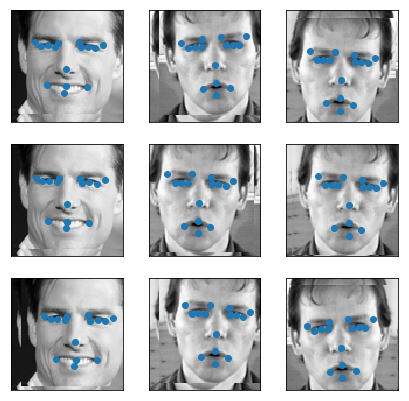

In [29]:
from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator()
shiftFlipPic = ShiftFlipPic(prop=0.1)

fig = plt.figure(figsize=(7,7))

count = 1
for batch in generator.flow(X_train[:2],y_train[:2]):
    X_batch, y_batch = shiftFlipPic.fit(*batch)

    ax = fig.add_subplot(3,3, count,xticks=[],yticks=[])  
    plot_sample(X_batch[0],y_batch[0],ax)
    count += 1
    if count == 10:
        break
plt.show()

In [31]:
def fit(model,modifier,train,validation,
        batch_size=32,epochs=2000,print_every=10,patience=np.Inf):
    '''
    model :        keras model object
    Modifier:      DataModifier() object
    train:         tuple containing two numpy arrays (X_train,y_train)
    validation:    tuple containing two numpy arrays (X_val,y_val)
    patience:      The back propagation algorithm will stop if the val_loss does not decrease 
                   after  epochs
    '''
    
    ## manually write fit method
    X_train,y_train = train
    X_val, y_val    = validation
    
    generator = ImageDataGenerator()
    
    history = {"loss":[],"val_loss":[]}
    for e in range(epochs):
        if e % print_every == 0:
            print('Epoch {:4}:'.format(e)), 
        ## -------- ##
        ## training
        ## -------- ##
        batches = 0
        loss_epoch = []
        for X_batch, y_batch in generator.flow(X_train, y_train, batch_size=batch_size):
            X_batch, y_batch = modifier.fit(X_batch, y_batch)
            hist = model.fit(X_batch, y_batch,verbose=False,epochs=1)
            loss_epoch.extend(hist.history["loss"])
            batches += 1
            if batches >= len(X_train) / batch_size:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break   
        loss = np.mean(loss_epoch)
        history["loss"].append(loss)
        ## --------- ##
        ## validation
        ## --------- ##
        y_pred = model.predict(X_val)
        val_loss = np.mean((y_pred - y_val)**2)
        history["val_loss"].append(val_loss)
        if e % print_every == 0:
            print("loss - {:6.5f}, val_loss - {:6.5f}".format(loss,val_loss))
        min_val_loss = np.min(history["val_loss"])
        ## Early stopping
        if patience is not np.Inf:
            if np.all(min_val_loss < np.array(history["val_loss"])[-patience:]):
                break
    return(history)

In [35]:
model3 = simple_cnn_model()
hist3 = fit(model3,shiftFlipPic,
           train=(X_train,y_train),
           validation=(X_val,y_val),
           batch_size=32,epochs=200,print_every=50,patience=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 48, 48, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 48, 48, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 24, 24, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 24, 24, 128)       73856     
__________

In [ ]:
sess = K.backend.get_session()
constant_graph = tf.graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), ['output_cnn/BiasAdd'])
tf.train.write_graph(constant_graph, "", "output_model_3.pb", as_text=False)

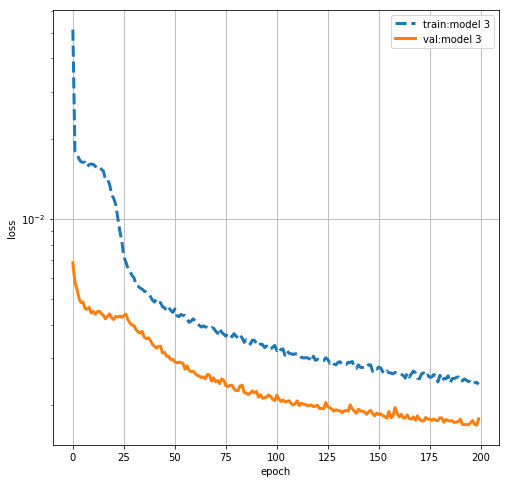

In [36]:
plt.figure(figsize=(8,8))
plot_loss(hist3,"model 3",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

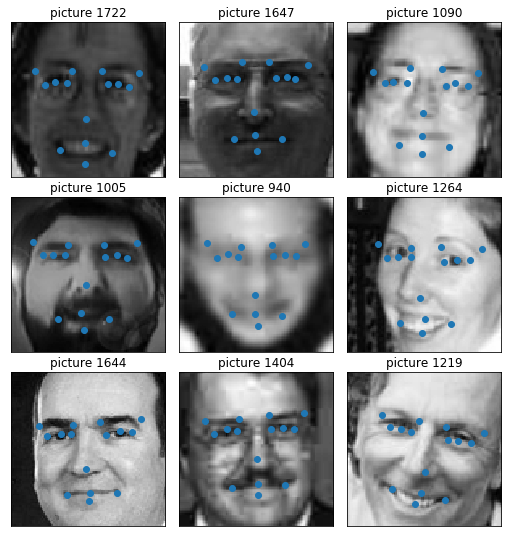

In [38]:
y_pred = model3.predict(X2d_test)

fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(hspace=0.13,wspace=0.0001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 9
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(X2d_test.shape[0])
    ax = fig.add_subplot(Npicture/3 , 3, count,xticks=[],yticks=[])        
    plot_sample(X2d_test[ipic],y_pred[ipic],ax)
    ax.set_title("picture "+ str(ipic))
    count += 1
plt.show()